In [3]:
import pandas as pd
import numpy as np
#Import libraries
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

## Load HPO data

In [2]:
data = pd.read_csv("C:\\Users\\Gebruiker\\OneDrive\\Documents\\DSLS\\integrated_omics\\project\\HPO\\phenotype_to_genes_V1268_OMIMandORPHA.txt_matrix.txt", sep = "\t")

In [3]:
data.head(5)

,-,HP:0001187,HP:0009902,HP:0025152,HP:0009905,HP:0009904,HP:0001188,HP:0009907,HP:0025158,HP:0001182,...,HP:0000558,HP:0001889,HP:0000553,HP:0001884,HP:0001883,HP:0000552,HP:0000555,HP:0001886,HP:0000554,HP:0001885
0,ENSG00000000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ENSG00000000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ENSG00000000419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ENSG00000000457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ENSG00000000460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.set_index('-', inplace=True)

In [5]:
data.head(5)

,HP:0001187,HP:0009902,HP:0025152,HP:0009905,HP:0009904,HP:0001188,HP:0009907,HP:0025158,HP:0001182,HP:0009906,...,HP:0000558,HP:0001889,HP:0000553,HP:0001884,HP:0001883,HP:0000552,HP:0000555,HP:0001886,HP:0000554,HP:0001885
-,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
hpo_genes = data.index
hpo_genes

Index(['ENSG00000000003', 'ENSG00000000005', 'ENSG00000000419',
       'ENSG00000000457', 'ENSG00000000460', 'ENSG00000000938',
       'ENSG00000000971', 'ENSG00000001036', 'ENSG00000001084',
       'ENSG00000001167',
       ...
       'ENSG00000283096', 'ENSG00000283098', 'ENSG00000283101',
       'ENSG00000283103', 'ENSG00000283108', 'ENSG00000283117',
       'ENSG00000283118', 'ENSG00000283122', 'ENSG00000283123',
       'ENSG00000283125'],
      dtype='object', name='-', length=56435)

## Load Height dataset from new_run

In [7]:
my_list = pd.read_csv("C:\\Users\\Gebruiker\\OneDrive\\Documents\\DSLS\\integrated_omics\\project\\POPS\\new_run_height\\output\\gene_output_height.preds", sep = '\t')

In [8]:
pops_height = my_list.sort_values(by = 'PoPS_Score', ascending = False)

In [9]:
pops_height

,ENSGID,PoPS_Score,Y,Y_proj,project_out_covariates_gene,feature_selection_gene,training_gene
4305,ENSG00000139219,4.637700,6.98730,3.756305,True,True,True
16513,ENSG00000164692,4.268547,7.63150,4.352896,True,True,True
16708,ENSG00000106034,4.206589,9.03960,5.409813,True,True,True
12797,ENSG00000114737,3.964449,14.93300,13.032016,True,True,True
4589,ENSG00000156076,3.833405,7.33790,4.209473,True,True,True
...,...,...,...,...,...,...,...
5898,ENSG00000257341,-3.160369,NaN,NaN,False,False,False
13826,ENSG00000109321,-3.311218,NaN,NaN,False,False,False
14542,ENSG00000175471,-3.374620,-0.75233,-4.581886,True,True,True
9414,ENSG00000167641,-3.531422,-0.35846,-1.863294,True,True,True


In [10]:
pops_height_ids = pops_height.ENSGID.values
pops_height_ids

array(['ENSG00000139219', 'ENSG00000164692', 'ENSG00000106034', ...,
       'ENSG00000175471', 'ENSG00000167641', 'ENSG00000213145'],
      dtype=object)

In [11]:
pops_height.ENSGID.nunique()

18383

## Genes Overlapping pops and HPO for height

In [12]:
overlapping_genes_data = data[data.index.isin(pops_height_ids)]


In [13]:
overlapping_genes_data = data[data.index.isin(pops_height_ids)]
#print(overlapping_genes.index)
overlapping_genes = overlapping_genes_data.index
total_overlap = overlapping_genes.shape[0]
print(f"Number of overlapping genes: {total_overlap}")

Number of overlapping genes: 18029


## Take the Significant genes from pops

In [14]:
significant_pops = pops_height.iloc[:500]
significant_pops.head(50)

,ENSGID,PoPS_Score,Y,Y_proj,project_out_covariates_gene,feature_selection_gene,training_gene
4305,ENSG00000139219,4.637700,6.9873,3.756305,True,True,True
16513,ENSG00000164692,4.268547,7.6315,4.352896,True,True,True
16708,ENSG00000106034,4.206589,9.0396,5.409813,True,True,True
12797,ENSG00000114737,3.964449,14.9330,13.032016,True,True,True
4589,ENSG00000156076,3.833405,7.3379,4.209473,True,True,True
14654,ENSG00000125347,3.712567,7.1695,4.398465,True,True,True
11057,ENSG00000115457,3.699302,5.2421,2.939381,True,True,True
14635,ENSG00000138829,3.576322,8.1675,4.659276,True,True,True
10244,ENSG00000049323,3.431869,10.3670,6.492244,True,True,True
17958,ENSG00000148120,3.419572,7.8626,4.606701,True,True,True


In [18]:
significant_pops_genes = significant_pops.ENSGID
total_significant_genes = significant_pops.shape[0]
print(f"Total number of significant pops genes: {total_significant_genes}")

Total number of significant pops genes: 500


## Take the Relevant HPO genes

In [19]:
height_HPO = 'HP:0000002'

hpo_term_data = overlapping_genes_data.loc[overlapping_genes_data[height_HPO] == 1, height_HPO]
print(hpo_term_data)
hpo_term_genes = hpo_term_data.index
total_hpo_term_genes = hpo_term_data.shape[0]
print(f"Number of HPO height genes: {total_hpo_term_genes}")

-
ENSG00000004487    1.0
ENSG00000004939    1.0
ENSG00000005339    1.0
ENSG00000005812    1.0
ENSG00000007314    1.0
                  ... 
ENSG00000258366    1.0
ENSG00000259384    1.0
ENSG00000266173    1.0
ENSG00000272047    1.0
ENSG00000272333    1.0
Name: HP:0000002, Length: 1012, dtype: float64
Number of HPO height genes: 1012


In [20]:
height_HPO = 'HP:0000002'

hpo_term_data = overlapping_genes_data.loc[overlapping_genes_data[height_HPO] == 1, height_HPO]
print(hpo_term_data)

-
ENSG00000004487    1.0
ENSG00000004939    1.0
ENSG00000005339    1.0
ENSG00000005812    1.0
ENSG00000007314    1.0
                  ... 
ENSG00000258366    1.0
ENSG00000259384    1.0
ENSG00000266173    1.0
ENSG00000272047    1.0
ENSG00000272333    1.0
Name: HP:0000002, Length: 1012, dtype: float64


## Create table

In [23]:
# Not in HPO height and not in GWAS
tl = overlapping_genes[~overlapping_genes.isin(significant_pops_genes) & ~overlapping_genes.isin(hpo_term_genes)].shape[0]
tl

16595

In [24]:
# In GWAS but not in HPO height
bl = overlapping_genes[overlapping_genes.isin(significant_pops_genes) & ~overlapping_genes.isin(hpo_term_genes)].shape[0]
bl

422

In [25]:
# Not in GWAS but IN HPO height
tr = overlapping_genes[~overlapping_genes.isin(significant_pops_genes) & overlapping_genes.isin(hpo_term_genes)].shape[0]
tr

934

In [26]:
# in GWAS and in HPO height
br = overlapping_genes[overlapping_genes.isin(significant_pops_genes) & overlapping_genes.isin(hpo_term_genes)].shape[0]
br

78

In [27]:
overlap_key_genes = (br * 100) / total_significant_genes
print(f"Overlap key genes with HPO: {overlap_key_genes:.2f}%")

Overlap key genes with HPO: 15.60%


In [28]:
total = tl + bl + tr + br
total

18029

In [29]:
print(f"Total overlap = {total_overlap}")
metrix = pd.DataFrame({"No HPO": [tl, bl, tl + bl], "Yes HPO": [tr, br, tr + br],
                      "sum": [tl + tr, bl + br, total]})
metrix.index = ["No GWAS", "Yes GWAS", "sum"]
metrix

Total overlap = 18029


,No HPO,Yes HPO,sum
No GWAS,16595,934,17529
Yes GWAS,422,78,500
sum,17017,1012,18029


In [30]:
metrix.values

array([[16595,   934, 17529],
       [  422,    78,   500],
       [17017,  1012, 18029]], dtype=int64)

In [31]:
import scipy.stats as stats

# link: https://www.statology.org/fishers-exact-test-python/

fish_data = metrix.iloc[0:2, 0:2].values

print(stats.fisher_exact(fish_data))

(3.2840709581172556, 1.3808760558411416e-16)


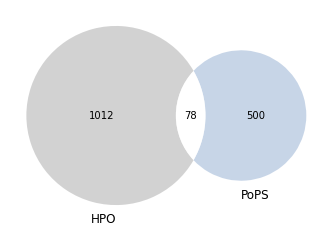

In [98]:
venn2(subsets = (1012, 500, 78), set_labels = ('HPO', 'PoPS'), set_colors=('silver', 'lightsteelblue'), alpha = 0.7)

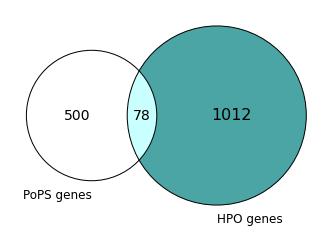

In [10]:
ax = plt.gca()
labels = ['PoPS genes', 'HPO genes']

v = venn2(subsets = (500, 1012, 78), 
          set_labels=(labels),
          set_colors=('white', 'teal'), alpha=0.7)
v.get_patch_by_id('10').set_alpha=(0.2)
v.get_patch_by_id('11').set_alpha=(0.3)
v.get_patch_by_id('01').set_alpha=(0.3)

v.get_label_by_id('10').set_fontsize(14)
v.get_label_by_id('11').set_fontsize(14)

text2 = 'HPO prostate genes/n'+ v.get_label_by_id('01').get_text()
v.get_label_by_id('01').set_fontsize(16)

venn2_circles(subsets=(500, 1012, 78), linewidth=1)

plt.show()



## Loading IBD dataset

In [32]:
data_IBD = pd.read_csv("C:\\Users\\Gebruiker\\OneDrive\\Documents\\DSLS\\integrated_omics\\project\\POPS\\new_run_IBD\\output\\gene_output_IBD.preds", sep = "\t")

In [33]:
data_IBD

,ENSGID,PoPS_Score,Y,Y_proj,project_out_covariates_gene,feature_selection_gene,training_gene
0,ENSG00000186092,-0.140390,NaN,NaN,False,False,False
1,ENSG00000235249,-0.069750,NaN,NaN,False,False,False
2,ENSG00000185097,-0.069647,NaN,NaN,False,False,False
3,ENSG00000187634,0.108231,-0.35698,-0.736082,True,True,True
4,ENSG00000188976,0.256960,2.02270,1.919442,True,True,True
...,...,...,...,...,...,...,...
18378,ENSG00000165724,-0.216866,NaN,NaN,False,False,False
18379,ENSG00000197070,-0.143512,NaN,NaN,False,False,False
18380,ENSG00000203993,0.006498,NaN,NaN,False,False,False
18381,ENSG00000181090,0.279129,NaN,NaN,False,False,False


In [34]:
pops_ibd = data_IBD.sort_values(by = 'PoPS_Score', ascending = False)


In [95]:
pops_ibd_ids = pops_ibd.ENSGID.values
pops_ibd_ids

array(['ENSG00000213145', 'ENSG00000119042', 'ENSG00000257341', ...,
       'ENSG00000167306', 'ENSG00000050165', 'ENSG00000146674'],
      dtype=object)

In [96]:
pops_ibd.ENSGID.nunique()

18383

## Genes Overlapping pops and HPO for IBD

In [97]:
overlapping_genes_ibd = data[data.index.isin(pops_ibd_ids)]

In [86]:
#print(overlapping_genes.index)
overlapping_genesibd = overlapping_genes_ibd.index
total_overlap = overlapping_genesibd.shape[0]
print(f"Number of ibd overlapping genes: {total_overlap}")

Number of ibd overlapping genes: 18029


## Take the Significant genes from pops

In [87]:
significant_ibd = pops_ibd.iloc[:500]
significant_ibd

,ENSGID,PoPS_Score,Y,Y_proj,project_out_covariates_gene,feature_selection_gene,training_gene
5897,ENSG00000213145,2.380612,NaN,NaN,False,False,False
10966,ENSG00000119042,2.123448,3.97610,3.308864,True,True,True
5898,ENSG00000257341,2.077931,NaN,NaN,False,False,False
11570,ENSG00000204103,1.793351,2.42360,1.824336,True,True,True
18058,ENSG00000106868,1.685084,6.99140,6.348577,True,True,True
...,...,...,...,...,...,...,...
4031,ENSG00000010278,0.508587,2.44000,1.722966,True,True,True
8769,ENSG00000104904,0.508184,1.61800,1.087285,True,True,True
11249,ENSG00000162804,0.508033,2.58490,1.916136,True,True,True
16031,ENSG00000078269,0.507821,0.72987,0.083384,True,True,True


In [88]:
significant_ibd_genes = significant_ibd.ENSGID
total_significant_genes = significant_ibd.shape[0]
print(f"Total number of significant pops genes: {total_significant_genes}")

Total number of significant pops genes: 500


## Take the Relevant HPO genes

In [89]:
ibd_HPO = 'HP:0012649' 

hpo_term_data = overlapping_genes_ibd.loc[overlapping_genes_ibd[ibd_HPO] == 1, ibd_HPO]
print(hpo_term_data)
hpo_term_genes = hpo_term_data.index
total_hpo_term_genes = hpo_term_data.shape[0]
print(f"Number of HPO height genes: {total_hpo_term_genes}")

-
ENSG00000001626    1.0
ENSG00000003400    1.0
ENSG00000004399    1.0
ENSG00000004455    1.0
ENSG00000004838    1.0
                  ... 
ENSG00000248098    1.0
ENSG00000253729    1.0
ENSG00000256061    1.0
ENSG00000258366    1.0
ENSG00000272047    1.0
Name: HP:0012649, Length: 656, dtype: float64
Number of HPO height genes: 656


## Create table

In [90]:
# Not in HPO height and not in GWAS
tl = overlapping_genesibd[~overlapping_genesibd.isin(significant_ibd_genes) & ~overlapping_genesibd.isin(hpo_term_genes)].shape[0]
tl

16910

In [91]:
# In GWAS but not in HPO height
bl = overlapping_genesibd[overlapping_genesibd.isin(significant_ibd_genes) & ~overlapping_genesibd.isin(hpo_term_genes)].shape[0]
bl

463

In [92]:
# Not in GWAS but IN HPO height
tr = overlapping_genesibd[~overlapping_genesibd.isin(significant_ibd_genes) & overlapping_genesibd.isin(hpo_term_genes)].shape[0]
tr

622

In [93]:
# in GWAS and in HPO height
br = overlapping_genesibd[overlapping_genesibd.isin(significant_ibd_genes) & overlapping_genesibd.isin(hpo_term_genes)].shape[0]
br

34

In [46]:
overlap_key_genes_ibd = (br * 100) / total_significant_genes
print(f"Overlap key genes with HPO: {overlap_key_genes_ibd:.2f}%")

Overlap key genes with HPO: 6.80%


In [47]:
total = tl + bl + tr + br
total

18029

In [94]:
print(f"Total overlap = {total_overlap}")
metrix = pd.DataFrame({"No HPO": [tl, bl, tl + bl], "Yes HPO": [tr, br, tr + br],
                      "sum": [tl + tr, bl + br, total]})
metrix.index = ["No GWAS", "Yes GWAS", "sum"]
metrix

Total overlap = 18029


,No HPO,Yes HPO,sum
No GWAS,16910,622,17532
Yes GWAS,463,34,497
sum,17373,656,18029


In [49]:
metrix.values

array([[16910,   622, 17532],
       [  463,    34,   497],
       [17373,   656, 18029]], dtype=int64)

In [50]:
import scipy.stats as stats

# link: https://www.statology.org/fishers-exact-test-python/

fish_data = metrix.iloc[0:2, 0:2].values

print(stats.fisher_exact(fish_data))

(1.9964164924683838, 0.0005541807907934105)


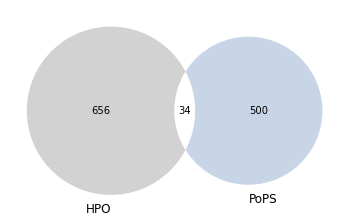

In [9]:
venn2(subsets = (656, 500, 34), set_labels = ('HPO', 'PoPS'), set_colors=('silver', 'lightsteelblue'), alpha = 0.7)

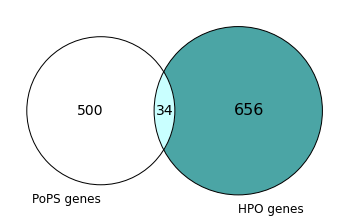

In [11]:
ax = plt.gca()
labels = ['PoPS genes', 'HPO genes']

v = venn2(subsets = (500, 656, 34), 
          set_labels=(labels),
          set_colors=('white', 'teal'), alpha=0.7)
v.get_patch_by_id('10').set_alpha=(0.2)
v.get_patch_by_id('11').set_alpha=(0.3)
v.get_patch_by_id('01').set_alpha=(0.3)

v.get_label_by_id('10').set_fontsize(14)
v.get_label_by_id('11').set_fontsize(14)

text2 = 'HPO prostate genes/n'+ v.get_label_by_id('01').get_text()
v.get_label_by_id('01').set_fontsize(16)

venn2_circles(subsets=(500, 656, 34), linewidth=1)

plt.show()


## Loading prstcan dataset

In [51]:
prc = pd.read_csv("C:\\Users\\Gebruiker\\OneDrive\\Documents\\DSLS\\integrated_omics\\project\\POPS\\new_run_prstcan\\gene_output_prstcan.preds", sep = "\t")

In [52]:
pops_prc = prc.sort_values(by = 'PoPS_Score', ascending = False)

In [53]:
pops_prc.head(5)

,ENSGID,PoPS_Score,Y,Y_proj,project_out_covariates_gene,feature_selection_gene,training_gene
9414,ENSG00000167641,2.558283,7.7950,7.374111,True,True,True
10858,ENSG00000091409,2.536766,7.4419,6.906221,True,True,True
14414,ENSG00000268942,2.406746,NaN,NaN,False,False,False
1261,ENSG00000173207,2.387875,4.7416,4.417603,True,True,True
11057,ENSG00000115457,2.200671,2.6117,2.144064,True,True,True


In [54]:
pops_prc_ids = pops_prc.ENSGID.values
pops_prc_ids

array(['ENSG00000167641', 'ENSG00000091409', 'ENSG00000268942', ...,
       'ENSG00000038945', 'ENSG00000067082', 'ENSG00000082438'],
      dtype=object)

In [55]:
pops_prc.ENSGID.nunique()

18383

## Genes Overlapping pops and HPO for prstcan

In [56]:
overlapping_genes_prc = data[data.index.isin(pops_prc_ids)]
#print(overlapping_genes.index)
overlapping_genes = overlapping_genes_prc.index
total_overlap = overlapping_genes.shape[0]
print(f"Number of ibd overlapping genes: {total_overlap}")


Number of ibd overlapping genes: 18029


## Take the Significant genes from pops¶

In [57]:
significant_prc = pops_prc.iloc[:500]
significant_prc

,ENSGID,PoPS_Score,Y,Y_proj,project_out_covariates_gene,feature_selection_gene,training_gene
9414,ENSG00000167641,2.558283,7.7950,7.374111,True,True,True
10858,ENSG00000091409,2.536766,7.4419,6.906221,True,True,True
14414,ENSG00000268942,2.406746,NaN,NaN,False,False,False
1261,ENSG00000173207,2.387875,4.7416,4.417603,True,True,True
11057,ENSG00000115457,2.200671,2.6117,2.144064,True,True,True
...,...,...,...,...,...,...,...
4758,ENSG00000136044,0.620650,NaN,NaN,False,False,False
14334,ENSG00000113594,0.620154,NaN,NaN,False,False,False
16568,ENSG00000166508,0.620143,0.8004,0.366044,True,True,True
10861,ENSG00000091436,0.619890,1.1292,0.585160,True,True,True


In [58]:
pops_prc.ENSGID.nunique()

18383

In [59]:
significant_prc_genes = significant_prc.ENSGID
total_significant_genes = significant_prc.shape[0]
print(f"Total number of significant pops genes: {total_significant_genes}")

Total number of significant pops genes: 500


## Take the Relevant HPO genes

In [60]:
prc_HPO = 'HP:0002664'

hpo_term_data = overlapping_genes_prc.loc[overlapping_genes_prc[prc_HPO] == 1, prc_HPO]
print(hpo_term_data)
hpo_term_genes = hpo_term_data.index
total_hpo_term_genes = hpo_term_data.shape[0]
print(f"Number of HPO height genes: {total_hpo_term_genes}")

-
ENSG00000000419    1.0
ENSG00000001626    1.0
ENSG00000001631    1.0
ENSG00000003400    1.0
ENSG00000004864    1.0
                  ... 
ENSG00000256269    1.0
ENSG00000258366    1.0
ENSG00000258839    1.0
ENSG00000265817    1.0
ENSG00000272047    1.0
Name: HP:0002664, Length: 655, dtype: float64
Number of HPO height genes: 655


In [61]:
# Not in HPO height and not in GWAS
tl = overlapping_genes[~overlapping_genes.isin(significant_prc_genes) & ~overlapping_genes.isin(hpo_term_genes)].shape[0]
tl

16909

In [62]:
# In GWAS but not in HPO height
bl = overlapping_genes[overlapping_genes.isin(significant_prc_genes) & ~overlapping_genes.isin(hpo_term_genes)].shape[0]
bl

465

In [63]:
# Not in GWAS but IN HPO height
tr = overlapping_genes[~overlapping_genes.isin(significant_prc_genes) & overlapping_genes.isin(hpo_term_genes)].shape[0]
tr

620

In [64]:
# in GWAS and in HPO height
br = overlapping_genes[overlapping_genes.isin(significant_prc_genes) & overlapping_genes.isin(hpo_term_genes)].shape[0]
br

35

In [65]:
overlap_key_genes = (br * 100) / total_significant_genes
print(f"Overlap key genes with HPO: {overlap_key_genes:.2f}%")

Overlap key genes with HPO: 7.00%


In [66]:
total = tl + bl + tr + br
total

18029

In [67]:
print(f"Total overlap = {total_overlap}")
metrix = pd.DataFrame({"No HPO": [tl, bl, tl + bl], "Yes HPO": [tr, br, tr + br],
                      "sum": [tl + tr, bl + br, total]})
metrix.index = ["No GWAS", "Yes GWAS", "sum"]
metrix

Total overlap = 18029


,No HPO,Yes HPO,sum
No GWAS,16909,620,17529
Yes GWAS,465,35,500
sum,17374,655,18029


In [68]:
metrix.values

array([[16909,   620, 17529],
       [  465,    35,   500],
       [17374,   655, 18029]], dtype=int64)

In [69]:
import scipy.stats as stats

# link: https://www.statology.org/fishers-exact-test-python/

fish_data = metrix.iloc[0:2, 0:2].values

print(stats.fisher_exact(fish_data))

(2.0527748872702047, 0.00022316338574356444)


### ven diagram

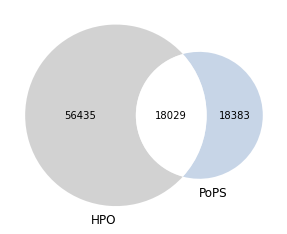

In [83]:
venn2(subsets = (56435, 18383, 18029), set_labels = ('HPO', 'PoPS'), set_colors=('silver', 'lightsteelblue'), alpha = 0.7)

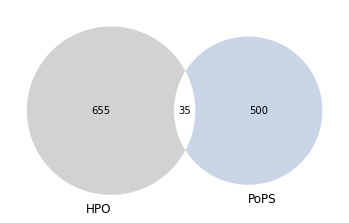

In [82]:
venn2(subsets = (655, 500, 35), set_labels = ('HPO', 'PoPS'), set_colors=('silver', 'lightsteelblue'), alpha = 0.7)

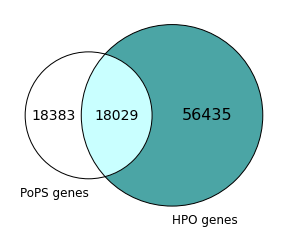

In [13]:
ax = plt.gca()
labels = ['PoPS genes', 'HPO genes']

v = venn2(subsets = (18383, 56435, 18029), 
          set_labels=(labels),
          set_colors=('white', 'teal'), alpha=0.7)
v.get_patch_by_id('10').set_alpha=(0.2)
v.get_patch_by_id('11').set_alpha=(0.3)
v.get_patch_by_id('01').set_alpha=(0.3)

v.get_label_by_id('10').set_fontsize(14)
v.get_label_by_id('11').set_fontsize(14)

text2 = 'HPO prostate genes/n'+ v.get_label_by_id('01').get_text()
v.get_label_by_id('01').set_fontsize(16)

venn2_circles(subsets=(18383, 56435, 18029), linewidth=1)

plt.show()


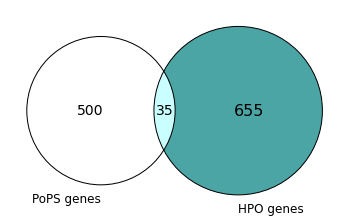

In [14]:
ax = plt.gca()
labels = ['PoPS genes', 'HPO genes']

v = venn2(subsets = (500, 655, 35), 
          set_labels=(labels),
          set_colors=('white', 'teal'), alpha=0.7)
v.get_patch_by_id('10').set_alpha=(0.2)
v.get_patch_by_id('11').set_alpha=(0.3)
v.get_patch_by_id('01').set_alpha=(0.3)

v.get_label_by_id('10').set_fontsize(14)
v.get_label_by_id('11').set_fontsize(14)

text2 = 'HPO prostate genes/n'+ v.get_label_by_id('01').get_text()
v.get_label_by_id('01').set_fontsize(16)

venn2_circles(subsets=(500, 655, 35), linewidth=1)

plt.show()
